##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Let's start with a model that's very effective at learning Cats v Dogs.

It's similar to the previous models that you have used, but I have updated the layers definition. Note that there are now 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.

Also, this will train for 100 epochs, because I want to plot the graph of loss and accuracy.

<h4>加载数据</h4>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-02-10 12:56:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  41.0MB/s    in 1.6s    

2021-02-10 12:56:32 (41.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

In [4]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('../data/')
zip_ref.close()

<h4>基础模型</h4>

<h5>训练模型</h5>

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, TensorBoard, History
from tensorflow.keras.backend import clear_session
from tensorflow.compat.v1 import reset_default_graph

# 初始化
clear_session()
reset_default_graph()
# 设置显存自动增长
physical_devices = tf.config.list_physical_devices('GPU')
for physical_device in physical_devices:
    tf.config.experimental.set_memory_growth(physical_device, enable=True)


base_dir = '../data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name="conv2d_1", input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=(2, 2), name="pool2d_1"),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name="conv2d_2"),
    MaxPool2D(pool_size=(2, 2), name="pool2d_2"),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name="conv2d_3"),
    MaxPool2D(pool_size=(2, 2), name="pool2d_3"),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name="conv2d_4"),
    MaxPool2D(pool_size=(2, 2), name="pool2d_4"),
    Flatten(name="flatten_5"),
    Dense(units=512, activation='relu', name="dense_5"),
    Dense(units=1, activation='sigmoid', name="dense_6")
], name="cats_dogs_classifier")

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history: History = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,  # 2000 images = batch_size * steps
    validation_steps=50,  # 1000 images = batch_size * steps
    epochs=100,
    workers=-1,
    use_multiprocessing=True
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 5s 54ms/step - loss: 0.6910 - accuracy: 0.5390 - val_loss: 0.6690 - val_accuracy: 0.6270
Epoch 2/100
100/100 [==============================] - 5s 53ms/step - loss: 0.6553 - accuracy: 0.6195 - val_loss: 0.6256 - val_accuracy: 0.6540
Epoch 3/100
100/100 [==============================] - 5s 53ms/step - loss: 0.6006 - accuracy: 0.6825 - val_loss: 0.8741 - val_accuracy: 0.5380
Epoch 4/100
100/100 [==============================] - 5s 52ms/step - loss: 0.5649 - accuracy: 0.7065 - val_loss: 0.5707 - val_accuracy: 0.7020
Epoch 5/100
100/100 [==============================] - 5s 53ms/step - loss: 0.5330 - accuracy: 0.7310 - val_loss: 0.5772 - val_accuracy: 0.6810
Epoch 6/100
100/100 [==============================] - 5s 52ms/step - loss: 0.5037 - accuracy: 0.7395 - val_loss: 0.5466 - val_accuracy: 0.7230
Epoch 7/100
100/100 [==============================]

Epoch 57/100
100/100 [==============================] - 5s 53ms/step - loss: 0.0056 - accuracy: 0.9975 - val_loss: 1.5338 - val_accuracy: 0.7620
Epoch 58/100
100/100 [==============================] - 5s 53ms/step - loss: 0.0032 - accuracy: 0.9985 - val_loss: 1.6124 - val_accuracy: 0.7620
Epoch 59/100
100/100 [==============================] - 5s 52ms/step - loss: 0.0021 - accuracy: 0.9990 - val_loss: 1.6362 - val_accuracy: 0.7700
Epoch 60/100
100/100 [==============================] - 5s 52ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 1.6103 - val_accuracy: 0.7550
Epoch 61/100
100/100 [==============================] - 5s 52ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 1.6322 - val_accuracy: 0.7580
Epoch 62/100
100/100 [==============================] - 5s 53ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 1.6648 - val_accuracy: 0.7560
Epoch 63/100
100/100 [==============================] - 5s 53ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 1.6696 - val_ac

<h5>learning curve</h5>

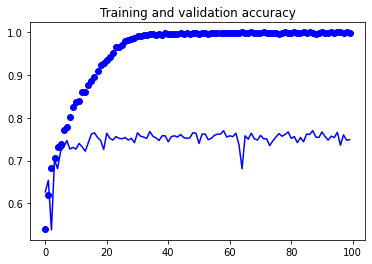

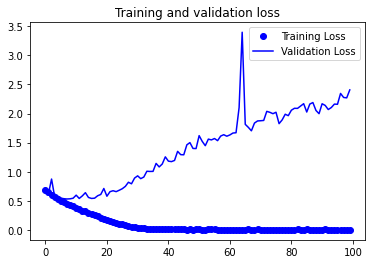

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Here's some code where we've added Image Augmentation. Run it to see the impact.


<h4>使用ImageDataGenerator对图片数据增强</h4>

<h5>训练模型</h5>

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, TensorBoard, History
from tensorflow.keras.backend import clear_session
from tensorflow.compat.v1 import reset_default_graph

# 初始化
clear_session()
reset_default_graph()

base_dir = '../data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name="conv2d_1", input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=(2, 2), name="pool2d_1"),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name="conv2d_2"),
    MaxPool2D(pool_size=(2, 2), name="pool2d_2"),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name="conv2d_3"),
    MaxPool2D(pool_size=(2, 2), name="pool2d_3"),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name="conv2d_4"),
    MaxPool2D(pool_size=(2, 2), name="pool2d_4"),
    Flatten(name="flatten_5"),
    Dense(units=512, activation='relu', name="dense_5"),
    Dense(units=1, activation='sigmoid', name="dense_6")
], name="cats_dogs_classifier")

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history: History = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,  # 2000 images = batch_size * steps
    validation_steps=50,  # 1000 images = batch_size * steps
    epochs=100,
    workers=-1,
    use_multiprocessing=True
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 12s 116ms/step - loss: 0.6927 - accuracy: 0.5280 - val_loss: 0.6820 - val_accuracy: 0.5780
Epoch 2/100
100/100 [==============================] - 12s 115ms/step - loss: 0.6814 - accuracy: 0.5635 - val_loss: 0.6618 - val_accuracy: 0.5740
Epoch 3/100
100/100 [==============================] - 11s 115ms/step - loss: 0.6651 - accuracy: 0.6020 - val_loss: 0.6827 - val_accuracy: 0.5480
Epoch 4/100
100/100 [==============================] - 11s 115ms/step - loss: 0.6441 - accuracy: 0.6135 - val_loss: 0.6121 - val_accuracy: 0.6560
Epoch 5/100
100/100 [==============================] - 11s 115ms/step - loss: 0.6332 - accuracy: 0.6440 - val_loss: 0.5954 - val_accuracy: 0.6760
Epoch 6/100
100/100 [==============================] - 12s 116ms/step - loss: 0.6176 - accuracy: 0.6560 - val_loss: 0.5822 - val_accuracy: 0.6890
Epoch 7/100
100/100 [===================

100/100 [==============================] - 12s 118ms/step - loss: 0.4511 - accuracy: 0.7825 - val_loss: 0.4219 - val_accuracy: 0.8070
Epoch 57/100
100/100 [==============================] - 12s 118ms/step - loss: 0.4255 - accuracy: 0.8100 - val_loss: 0.4489 - val_accuracy: 0.7940
Epoch 58/100
100/100 [==============================] - 11s 114ms/step - loss: 0.4369 - accuracy: 0.7995 - val_loss: 0.4478 - val_accuracy: 0.7850
Epoch 59/100
100/100 [==============================] - 11s 114ms/step - loss: 0.4369 - accuracy: 0.7990 - val_loss: 0.5107 - val_accuracy: 0.7540
Epoch 60/100
100/100 [==============================] - 11s 113ms/step - loss: 0.4310 - accuracy: 0.8010 - val_loss: 0.4334 - val_accuracy: 0.8010
Epoch 61/100
100/100 [==============================] - 11s 113ms/step - loss: 0.4241 - accuracy: 0.8065 - val_loss: 0.4117 - val_accuracy: 0.8130
Epoch 62/100
100/100 [==============================] - 11s 114ms/step - loss: 0.4190 - accuracy: 0.8070 - val_loss: 0.4171 - val_a

<h5>learning curve</h5>

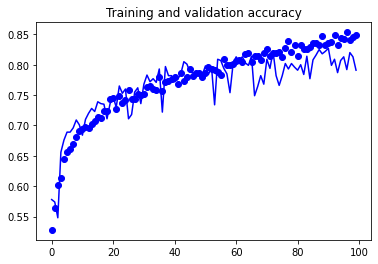

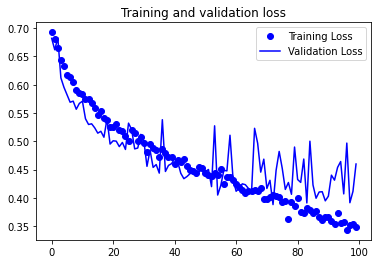

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h4>使用Dropout正则化</h4>

<h5>训练模型</h5>

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, TensorBoard, History
from tensorflow.keras.backend import clear_session
from tensorflow.compat.v1 import reset_default_graph

# 初始化
clear_session()
reset_default_graph()

base_dir = '../data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name="conv2d_1", input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=(2, 2), name="pool2d_1"),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name="conv2d_2"),
    MaxPool2D(pool_size=(2, 2), name="pool2d_2"),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name="conv2d_3"),
    MaxPool2D(pool_size=(2, 2), name="pool2d_3"),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name="conv2d_4"),
    MaxPool2D(pool_size=(2, 2), name="pool2d_4"),
    Dropout(rate=0.5, name="dropout_5"),
    Flatten(name="flatten_5"),
    Dense(units=512, activation='relu', name="dense_5"),
    Dense(units=1, activation='sigmoid', name="dense_6")
], name="cats_dogs_classifier")

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history: History = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,  # 2000 images = batch_size * steps
    validation_steps=50,  # 1000 images = batch_size * steps
    epochs=100,
    workers=-1,
    use_multiprocessing=True
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 12s 118ms/step - loss: 0.6919 - accuracy: 0.5070 - val_loss: 0.6776 - val_accuracy: 0.5980
Epoch 2/100
100/100 [==============================] - 12s 116ms/step - loss: 0.6821 - accuracy: 0.5635 - val_loss: 0.6571 - val_accuracy: 0.6050
Epoch 3/100
100/100 [==============================] - 12s 116ms/step - loss: 0.6712 - accuracy: 0.5800 - val_loss: 0.6507 - val_accuracy: 0.6040
Epoch 4/100
100/100 [==============================] - 12s 115ms/step - loss: 0.6654 - accuracy: 0.5900 - val_loss: 0.6560 - val_accuracy: 0.5900
Epoch 5/100
100/100 [==============================] - 12s 115ms/step - loss: 0.6485 - accuracy: 0.6210 - val_loss: 0.6163 - val_accuracy: 0.6360
Epoch 6/100
100/100 [==============================] - 12s 115ms/step - loss: 0.6391 - accuracy: 0.6400 - val_loss: 0.6057 - val_accuracy: 0.6620
Epoch 7/100
100/100 [===================

100/100 [==============================] - 11s 114ms/step - loss: 0.4477 - accuracy: 0.7890 - val_loss: 0.4295 - val_accuracy: 0.7920
Epoch 56/100
100/100 [==============================] - 12s 115ms/step - loss: 0.4432 - accuracy: 0.7920 - val_loss: 0.4984 - val_accuracy: 0.7680
Epoch 57/100
100/100 [==============================] - 11s 115ms/step - loss: 0.4505 - accuracy: 0.7735 - val_loss: 0.4301 - val_accuracy: 0.7920
Epoch 58/100
100/100 [==============================] - 11s 115ms/step - loss: 0.4414 - accuracy: 0.8035 - val_loss: 0.4499 - val_accuracy: 0.7870
Epoch 59/100
100/100 [==============================] - 11s 115ms/step - loss: 0.4383 - accuracy: 0.7930 - val_loss: 0.4439 - val_accuracy: 0.7850
Epoch 60/100
100/100 [==============================] - 11s 114ms/step - loss: 0.4458 - accuracy: 0.7935 - val_loss: 0.4441 - val_accuracy: 0.7950
Epoch 61/100
100/100 [==============================] - 11s 115ms/step - loss: 0.4392 - accuracy: 0.7915 - val_loss: 0.4742 - val_a

<h5>learning curve</h5>

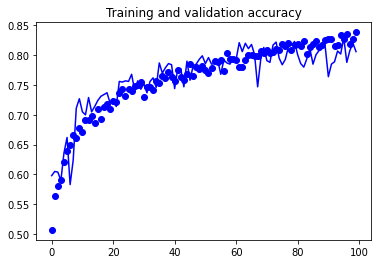

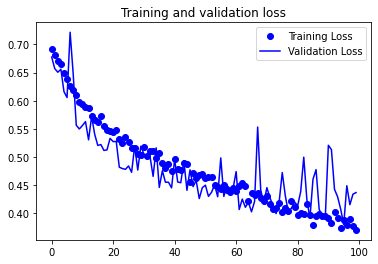

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()